<a href="https://colab.research.google.com/github/yooje153/-/blob/main/Lecture07_matplotlib(%EC%88%98%EC%97%85%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matplotlib 소개

* 데이터 시각화에 사용되는 파이썬 라이브러리  
* 간단한 막대 그래프, 선 그래프, 산포도를 그리는 용도로 matplotlib을 많이 사용한다
* Gallery <https://matplotlib.org/stable/gallery/index.html>

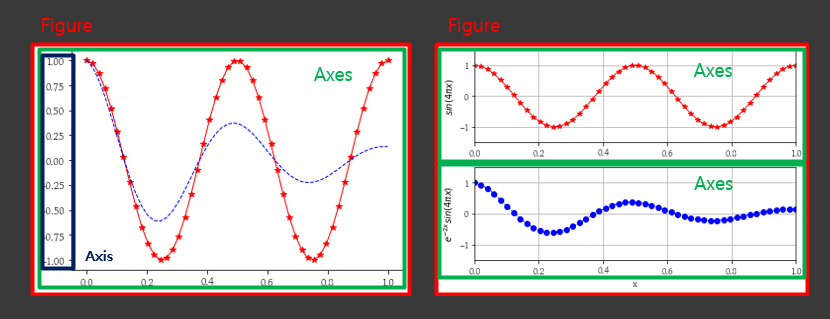

용어 설명
* figure : 그래프를 그리는 공간(종이)
* axes : 그래프가 그려지는 Figure의 하위 섹션을 의미. 즉, figure내에서 현재 내가 그래프를 그릴 부분  
         Title, X-Label, Y-Label 등의 값을 통제. 하나의 figure는 여러개의 axes를 가질 수 있음
* axis : axes의 하위 요소를 의미. 그래프의 척도를 나타내는 숫자 선 (x축, y축)

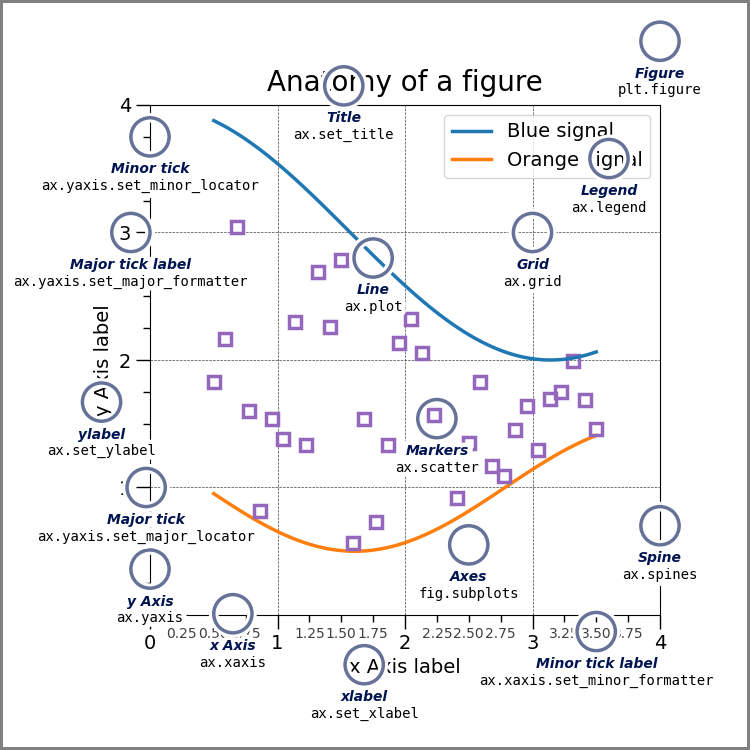

sorce: https://matplotlib.org/stable/gallery/showcase/anatomy.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


* 크게 2가지 방식으로 그림을 그림
    * stateless 방식 : figure와 axes를 만든 뒤, 각 axes에 접근하여 그림을 그리는 방식
    * stateful 방식 : 현재의 figure와 axes에 자동으로 접근하여 그림을 그리는 방식 (matplotplit.pyplot의 방식임)


## Method1. 객체지향 API 이용  
Matplotlib에 구현된 객체 지향 라이브러리를 직접 활용하는 방법. 그래프의 각 구성요소를 다양하게 제어할 때 사용  
직접 figure객체와 axes를 생성. 선택한 axes 대상으로 그래프를 만들어주는 함수

In [ ]:
x = np.linspace(0,1,50)
y = np.cos(4*np.pi*x)

fig = plt.figure() # 직접 figure 객체 생성
ax = fig.subplots() # 직접 axes 생성
ax.plot(x, y)

## Method 2. Pyplot API 이용  
모듈에 있는 함수들을 불러와서 구현하는 방법. 사용하기 편리함  
현재의 axes를 대상으로 그래프를 만들어 주는 함수

In [ ]:
x = np.linspace(0,1,50)
y = np.cos(4*np.pi*x)
plt.plot(x, y )

## Method 3. 객체지향 API + Pyplot API 조합  
`plt.subplots()`는 Figure 객체와 Axes 객체를 동시에 리턴한다

In [ ]:
x = np.linspace(0,1,50)
y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

fig,ax = plt.subplots()
ax.plot(x,y1,'r',lw=1)
ax.plot(x,y2)

# 선그래프

## 기본

* `plt.plot(x, y, data)` : 선, 마커(점)를 그릴 때 사용되는 기본 함수
* `%matplotlib inline` : 노트북에 그림이 바로 출력되는 모듈.  Juptyer Notebook에서 사용되는 코드. Colab에서는 이 명령어 없이도 노트북에 출력됨
* 그림의 끝에 `;`를 붙이는 경우 : 문구 출력 생략

In [ ]:
x = [1, 2, 3]
y = [1, 5, 10]
plt.plot(x, y)

In [ ]:
# 문구 출력 생략
plt.plot(x, y);

In [ ]:
# x를 입력하지 않는 경우 [0, 1, 2, ..]를 자동으로 생성하여 출력
plt.plot(y);

In [ ]:
# 구글드라이브 마운팅
from google.colab import drive
drive.mount("/content/drive/")

In [ ]:
# 서울 2021년 10월 일평균 기온 데이터 다운로드 (https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70)
dpath = "/content/drive/MyDrive/강의/2022-2 AI를 위한 프로그래밍/data/"
df = pd.read_csv(dpath + "seoul_oct2021.csv", skiprows=7, encoding="euc-kr")
df.head()

In [ ]:
# 한글을 읽지 못하는 오류가 발생할 수 있으므로 영어로 칼럼명 변경하는 작업
df.columns = ["date", "site", "temp_mean", "temp_min", "temp_max"]
df.head()

In [ ]:
plt.plot("date", "temp_mean", data=df);

In [ ]:
# x축이 날짜로 설정되어 있어 그래프에서 겹침 현상 발생. 따라서 x축 변경
# 데이터 개수 확인
df.date.shape

In [ ]:
plt.plot(range(1, 31), df.temp_mean);

## title

In [ ]:
x = range(1, 31)
y = df.temp_mean

plt.plot(x, y)

# 제목설정


## axis label

In [ ]:
plt.plot(x, y)
plt.title("Line graph")

# 축 레이블 설정


## legend

In [ ]:
plt.plot(x, y, label="Mean temperature (\u2103)")

# 범례 설정


In [ ]:
# 범례 위치 지정 (loc="upper left", "upper center", "upper right",
#                    "center left", "center", "center right",
#                    "lower left", "lower center", "lower right"])

plt.plot(x, y, label="Mean temperature (\u2103)")
plt.legend(loc="center left");

In [ ]:
# 범례 위치 지정 (튜플)
plt.plot(x, y, label="Mean temperature (\u2103)")
plt.legend(loc=(0.5, 0.4));

## linewidth

In [ ]:
plt.plot(x, y, linewidth=3);

## linestyle

character | description
:--- | :---
`-` | solid
`--` | dashed
`-.` | dash-dot
`:` | `dotted

In [ ]:
?plt.plot

In [ ]:
x = np.arange(1, 31)

plt.plot(x, y, linestyle="-", label="x1")
plt.plot(x+2, y, linestyle="--",  label="x2")
plt.plot(x+5, y, linestyle="-.",  label="x3")
plt.plot(x+10, y, linestyle=":",  label="x4")
plt.legend();

## marker



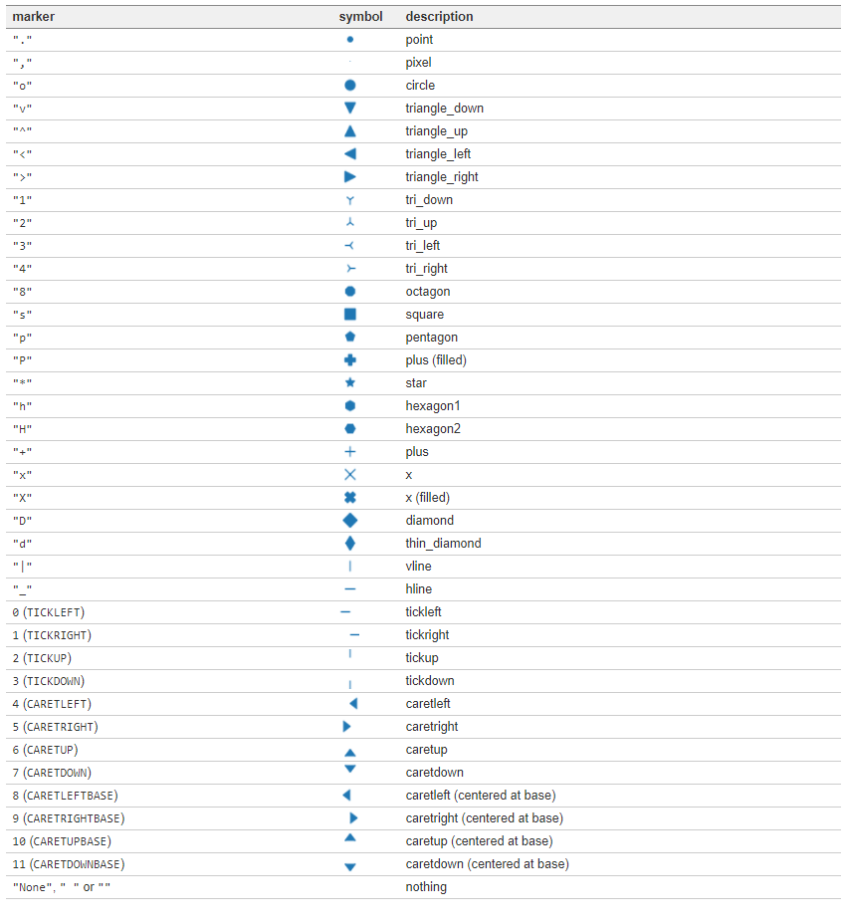

In [ ]:
plt.plot(x, y, marker="s")

In [ ]:
# 선 추가
plt.plot(x, y, marker="o")
plt.plot(x+2, y, marker="*", linestyle=":")

In [ ]:
# 마커 크기 조정
plt.plot(x, y, marker="o", linestyle=":", markersize=10)

## color

* 축약어: `b`lue, `g`reen, `r`ed, `c`yan, `m`agenta, `y`ellow, `w`hite, blac`k`
* 키워드 : <https://matplotlib.org/stable/gallery/color/named_colors.html>
* Hex code(16진수 코드) : 구글에서 `color picker` 검색 후 원하는 색상 찍어서 코드 복사

In [ ]:
?plt.plot

In [ ]:
plt.plot(x, y, color="r");

In [ ]:
plt.plot(x, y, color="darkviolet", linewidth=3, linestyle="-.")

In [ ]:
plt.plot(x, y, color="#fbc7fc", linewidth=4);

In [ ]:
# marker 색만 변경
plt.plot(x, y, marker="o", markerfacecolor="orange")

In [ ]:
# marker 테두리색과 두께 변경
plt.plot(x, y, marker="o", markerfacecolor="y", markeredgecolor="r", markeredgewidth=1)

## format

* line style, marker, color를 조합하여 다양한 포맷팅 축약어 생성
* 조합 순서 상관없음
* 예시
    * `b` : blue, solid, no marker
    * `bo` : blue, circle, no line
    * `og-` : circle, green, solid

In [ ]:
plt.plot(x, y, "b")  # blue, solid, no marker

In [ ]:
plt.plot(x, y, "*b") # blue, circle, no line

In [ ]:
plt.plot(x, y, "og-")  # circle, green, solid

In [ ]:
plt.plot(x, y, "^r:")  # triangle_up, red, dotted

In [ ]:
plt.plot(x, y, "-.*k")  # dash-dot, star marker, black

## 축약어

* linestyle = ls
* linewidth = lw
* color = c
* markersize = ms
* markerfacecolor = mfc
* markeredgecolor = mec
* markeredgewidth = mew

In [ ]:
plt.plot(x, y, ls="-.", lw=1, marker="o", ms=10, c="r", mfc="y", mec="navy", mew=3);

## 투명도

In [ ]:
plt.plot(x, y, ls="--", lw=1, marker="o", ms=10, c="r", mfc="y", mec="navy", mew=3, alpha=0.8); # alpha: 0~1

# 그래프 조정

* `plt.figure()`
    * `figsize=(6.4, 4.8)` : 그래프 크기
    * `dpi=100` : 해상도
    * `facecolor="w"` : 전면 색 (배경색)


## 그래프 크기

In [ ]:
?plt.figure

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x, y);

In [ ]:
plt.figure(figsize=(5, 8))
plt.plot(x, y);

## 해상도

In [ ]:
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(x, y);

## 배경색

In [ ]:
plt.figure(facecolor="gray")
plt.plot(x, y);

In [ ]:
# plt.figure(facecolor="gray")
plt.axes(facecolor="gray")

plt.plot(x, y);

## 축 범위

* `plt.xlim(xmin, xmax)`, `plt.ylim(ymin, ymax)`
* `plt.axis([xmin, xmax, ymin, ymax])`
* `plt.axis(option="auto")` : 옵션 지정
    * `"auto"` : 자동 설정
    * `"normal"` : 자동 설정
    * `"on"`: 축과 라벨 출력
    * `"off"`: 축과 라벨 미출력
    * `"equal"` : 각 축의 범위와 축의 스케일 동일하게 설정
    * `"scaled"` : 그래프의 차원과 동일하게 축의 스케일 설정
    * `"tight"` : 전체 데이터가 보이는 범위에 맞게 축 확장
    * `"image"` : 데이터 범위에 대해 축의 범위를 사용한 `scaled`
    * `"square"` : x축과 y축의 크기가 같도록 설정
    

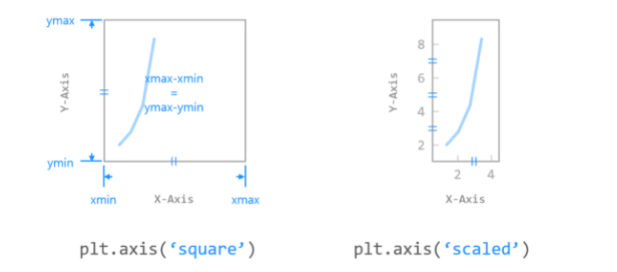

In [ ]:
plt.plot(x, y)
plt.xlim(1, 31)
plt.ylim(0, 30);

In [ ]:
plt.plot(x, y)
plt.axis("square");

In [ ]:
plt.plot(x, y)
plt.axis("scaled");

In [ ]:
# 축의 범위 얻기

plt.plot(x, y)
plt.axis("scaled");

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
print(xmin, xmax, ymin, ymax)

xmin, xmax, ymin, ymax = plt.axis()
print(xmin, xmax, ymin, ymax)

x_range, y_range = plt.xlim(), plt.ylim()
print(x_range, y_range)

## 축 눈금

* `plt.xticks(ticks, labels=None)`
* `plt.yticks(ticks, labels=None, )`
    * python list 또는 numpy array 지정
    * label 지정 가능

In [ ]:
?plt.xticks

In [ ]:
np.arange(1, 32, 10)

In [ ]:
plt.plot(x, y)
plt.ylim(0, 30)
plt.xticks(np.arange(1, 32, 10), labels=["1d", "11d", "21d", "31d"])
plt.yticks(np.arange(0, 31, 5))

## 그리드


In [ ]:
plt.plot(x, y)
plt.grid();

In [ ]:
# y축에만 그리기
plt.plot(x, y)
plt.grid(axis="y")

In [ ]:
# 선 스타일 지정하기
plt.plot(x, y)
plt.grid(axis="x", c="k")
plt.grid(axis="y", c="r", ls=":");

## 파일 저장

* `plt.savefig(filename, dpi=100, format=None)`
    * filename : 파일 경로. 확장자 포함
    * dpi : 해상도
    * format : 명시적 파일포맷 (png, jpeg, tif, pdf, svg 등)

---



In [ ]:
# 그림 저장 경로 지정
outpath = "/content/drive/MyDrive/강의/2022-2 AI를 위한 프로그래밍/data/output/"

In [ ]:
plt.plot(x, y)
plt.savefig(outpath + "figure.jpeg");

In [ ]:
# 해상도와 전면색 지정해보기
fig = plt.figure(figsize=(3,3), dpi=300, facecolor="lightblue")
plt.plot(x, y)

plt.savefig(outpath + "figure01.jpeg", facecolor=fig.get_facecolor())

## 여러 데이터로 그리기

In [ ]:
df.head()

In [ ]:
x = range(1, 31)
y1 = df.temp_mean
y2 = df.temp_min
y3 = df.temp_max

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3);

In [ ]:
plt.plot(x, y1, label="mean")
plt.plot(x, y2, label="min")
plt.plot(x, y3, label="max")

plt.legend();

In [ ]:
# 선마다 색상 다르게 입혀보기
plt.plot(x, y1, lw=2, c="k", label="mean")
plt.plot(x, y2, "--ob", label="min")
plt.plot(x, y3, "*-.r", label="max")

plt.legend();

In [ ]:
# legend 열 개수 변경
plt.plot(x, y1, lw=2, c="k", label="mean")
plt.plot(x, y2, "--ob", label="min")
plt.plot(x, y3, "*-.r", label="max")

plt.legend(ncol=3);

In [ ]:
# legend의 열 개수 및 위치 변경
plt.plot(x, y1, lw=2, c="k", label="mean")
plt.plot(x, y2, "--ob", label="min")
plt.plot(x, y3, "*-.r", label="max")

plt.legend(ncol=2, loc="lower left");

#  그래프 종류

| 함수 | 설명 |
|------|------|
| `plot` | 플롯 라인 또는 마커 |
| `bar` | 세로 막대 그래프 |
| `barh` | 가로 막대 그래프 |
| `boxplot` | 박스 플롯 |
| `hist` | 히스토그램 플롯 |
| `scatter` | x대 y의 산점도 생성 |
| `pie` | 파이 차트 플롯 |



## 막대그림

In [ ]:
?plt.bar

In [ ]:
# 연도별 학생 수 데이터 생성
year = [x for x in range(2010,2024,2)]
n_std = [40, 60,55, 75, 62, 46,80]

In [ ]:
# 막대그래프 그리기
plt.bar(year, n_std)

In [ ]:
# 막대그래프 너비조정
plt.bar(year, n_std, width=1.5)
plt.xlabel("Year")
plt.ylabel("Student numbers");

In [ ]:
# 막대 색상 변경 / ylim(0, 100)으로 설정
plt.bar(year, n_std, width=1.5, color = 'r')
plt.xlabel("Year")
plt.ylabel("Student numbers");
plt.ylim(0, 100);

In [ ]:
# x축 눈금 이름을 class_A 부터 class_G라고 변경 / rotation 주기
xticks = "class_" + pd.Series(["A", "B", "C", "D", "E","F","G"])
xticks

plt.bar(year, n_std, width=1.5, color = 'r')
plt.xlabel("Year")
plt.ylabel("Student numbers");
plt.ylim(0, 100);
plt.xticks(year, xticks, rotation=45);

In [ ]:
# 가로막대그래프
plt.barh(year, n_std, color = 'r')
plt.ylabel("Year")
plt.xlabel("Student numbers");
plt.xlim(0, 100);
plt.yticks(year, xticks);

In [ ]:
# 무늬 주기
f = plt.bar(year, n_std, hatch=".")

In [ ]:
# 무늬 주기
f = plt.bar(year, n_std,)
f[0].set_hatch("/")
f[1].set_hatch("\\")
f[2].set_hatch("o")
f[3].set_hatch("*")
f[4].set_hatch("+")
f[5].set_hatch("-")
f[6].set_hatch("|");

In [ ]:
# 데이터 만들기
df1 = pd.DataFrame({'Year': year, 'Students' :n_std, 'Major' : ['A', 'B','C','C','B','A','A']})
df1

In [ ]:
# 전공별 데이터 추출
sub1 = df1.loc[df1["Major"]=='A']
sub2 = df1.loc[df1["Major"]=='B']
sub3 = df1.loc[df1["Major"]=='C']

In [ ]:
# 전공마다 막대그래프 색상 다르게 표현1
plt.bar(sub1.Year, sub1.Students, color = 'r', label="A")
plt.bar(sub2.Year, sub2.Students, color = 'b', label="B")
plt.bar(sub3.Year, sub3.Students, color = 'y', label="C")
plt.legend(ncol=3, loc="upper center");

In [ ]:
# 전공마다 막대그래프 색상 다르게 표현2
groups = df1.groupby('Major')

for name, group in groups:
    plt.bar(group.Year, group.Students, label=name)
plt.legend(fontsize=12, loc='upper left');



## 히스토그램  
히스토그램 (Histogram)은 도수분포표를 그래프로 나타낸 것으로서, 가로축은 계급, 세로축은 도수를 나타낸다.  

`hist()` 함수의 bins 파라미터는 히스토그램의 가로축 구간의 개수를 지정




In [ ]:
?plt.hist

In [ ]:
# Loading 'titanic' dataset from seaborn
import seaborn as sns
titanic = sns.load_dataset("titanic")

titanic.head()

In [ ]:
plt.hist(titanic.age);

In [ ]:
# bin 개수를 15개로 조정 / 투명도 주고, color, edgecolor 주기
plt.hist(titanic.age, bins=15, alpha=0.5, color="steelblue", edgecolor="navy", histtype="bar");

In [ ]:
# 누적 히스토그램 그리기
plt.hist(titanic.age, cumulative=True, label='cumulative=True')
plt.hist(titanic.age, cumulative=False, label='cumulative=False')
plt.legend(loc='upper left');

In [ ]:
# 히스토그램 종류 지정하기: {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’} 중에서 선택할 수 있으며, 디폴트는 ‘bar

age_10=titanic.age-10

plt.hist((titanic.age,age_10), histtype ='bar')
plt.title('histtype - bar')
plt.figure()

plt.hist((titanic.age,age_10), histtype ='barstacked')
plt.title('histtype - barstacked')
plt.figure()

plt.hist((titanic.age,age_10), histtype ='step')
plt.title('histtype - step')
plt.figure()

plt.hist((titanic.age,age_10), histtype ='stepfilled')
plt.title('histtype - stepfilled')
plt.figure();


In [ ]:
# 여러개 겹쳐그리기
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(-5, 2, 1000)
x3 = np.random.normal(5, 3, 1000)
arg = {"histtype":"stepfilled", "alpha":0.3}

plt.hist(x1, **arg)
plt.hist(x2, **arg)
plt.hist(x3, **arg);

## 파이차트


In [ ]:
?plt.pie

In [ ]:
titanic.head()

In [ ]:
x = titanic.loc[titanic["embarked"]=='S', "sex"].value_counts()
x

In [ ]:
plt.pie(x);

In [ ]:
# 라벨 붙이기
plt.pie(x, labels=x.index);

In [ ]:
# 비율을 소수점 두번째 자리까지 붙이고 퍼센트 표기하기
plt.pie(x, labels=x.index, autopct="%.2f%%");

In [ ]:
# 시작위치 변경하고, 시계방향으로 그리기
plt.pie(x, labels=x.index, autopct="%.2f%%", startangle=90, counterclock=False);

In [ ]:
# 조각을 떼서 강조하기
plt.pie(x, labels=x.index, explode=[0.1, 0.1]);

In [ ]:
# 레전드 따로 붙이기
plt.pie(x, labels=x.index)
plt.legend(loc=(1.1, 0.5), title="Sex");

In [ ]:
# 색상 지정하기
colors = ['silver','gold']
plt.pie(x, labels=x.index, colors=colors);

# **THE END**